<a href="https://colab.research.google.com/github/jasog01/cursomlean/blob/main/Proyecto_3_%E2%80%93_Una_exploraci%C3%B3n_profunda_a_la_base_de_nivel_de_obesidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto 3 – Una exploración profunda a la base de nivel de obesidad

**Integrantes del Grupo:**
- Jose Sogamoso
- Andres Marin
- Blexy Granados

**Descripción del Problema:**

Estimación de los niveles de obesidad en función de los hábitos alimentarios y la condición física, se genera un modelo de clusterizacion y reducción de dimensionalidad PCA.

Fuente de datos https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
url ='https://raw.githubusercontent.com/Fire2025/Visualizacion_CienciadeDatos/main/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(url, delimiter = ',')


### **Características:** Seleccionamos las columnas relacionadas con hábitos de alimentación y actividad física.

1. FAVC (Frequent consumption of high caloric food)
2. FCVC (Frequency of consumption of vegetables)
3. NCP (Number of main meals)
4. CAEC (Consumption of food between meals)
5. SMOKE (Smoking)
6. CH2O (Consumption of water daily)
7. SCC (Calories consumption monitoring)
8. FAF (Physical activity frequency)
9. TUE (Time using technology devices)

In [ ]:
# Seleccionando características relevantes
features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE']
X = df[features]

In [ ]:
X

,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE
0,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000
1,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000
2,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000
3,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000
4,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247
2107,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270
2108,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288
2109,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035


In [ ]:
# Preprocesamiento: Codificación y Escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']),
        ('cat', OneHotEncoder(), ['FAVC', 'CAEC', 'SMOKE', 'SCC'])
    ])

X_processed = preprocessor.fit_transform(X)

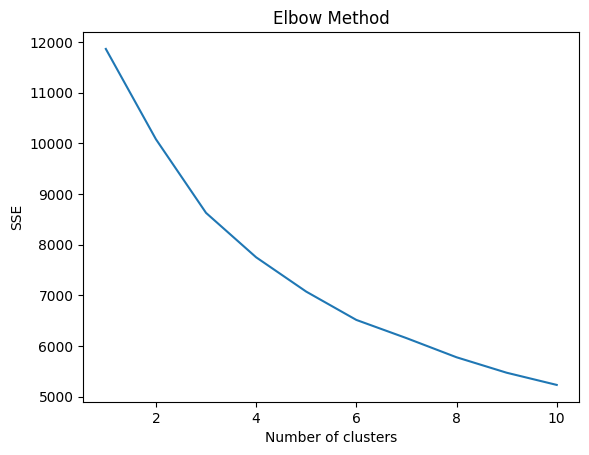

In [ ]:
# Método del codo para determinar el número de clústeres
sse = {}
for k in range(1, 11):
    #kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_processed)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [ ]:
# Asignando el número óptimo de clústeres
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_processed)

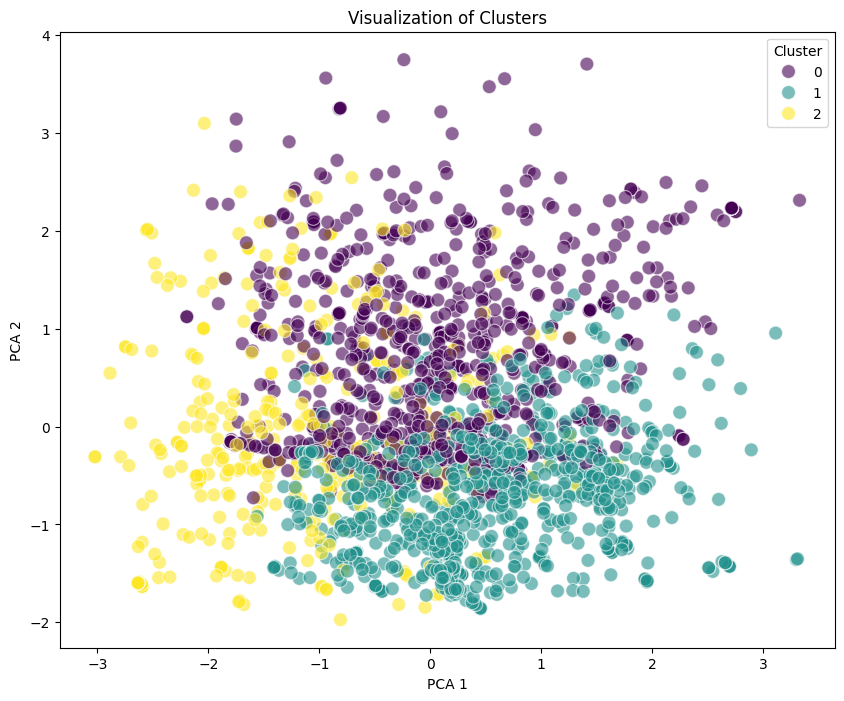

In [ ]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Visualizando los clústeres
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.6)
plt.title('Visualization of Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


## **Análisis Resultados de los clústeres:**

Análisis de los Centroides: Ahora procedemos a analizar los centroides de los clúster determinados por el algortimo K-Means.

*Estos centroides nos dirán las características promedio de las observaciones agrupadas en cada clúster*

In [ ]:
# Extraer los centroides
centroids = kmeans.cluster_centers_

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Extraemos el transformador para características numéricas
scaler = preprocessor.named_transformers_['num']

# Inversión de la transformación de escala para los centroides numéricos
num_centroids = scaler.inverse_transform(centroids[:, :5])

# Crear un DataFrame para visualizar los centroides numéricos
features_num = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
centroids_df_num = pd.DataFrame(num_centroids, columns=features_num)
print("Centroides Numéricos Inversos:\n", centroids_df_num)


Centroides Numéricos Inversos:
        FCVC       NCP      CH2O       FAF       TUE
0  1.942321  3.028755  1.958835  1.008297  0.753227
1  2.914394  3.026685  2.089657  1.088262  0.590367
2  2.354422  1.240258  1.936017  0.847738  0.603238


## **Interpretación de las Características Numéricas:**
1. FCVC (Frequency of consumption of vegetables): Frecuencia de consumo de vegetales.
2. NCP (Number of main meals): Número de comidas principales.
3. CH2O (Consumption of water daily): Consumo diario de agua.
4. FAF (Physical activity frequency): Frecuencia de actividad física.
5. TUE (Time using technology devices): Tiempo de uso de dispositivos tecnológicos.

*   Clúster 0: Hábitos moderados en consumo de vegetales y actividad física, pero un consumo más elevado de comidas y uso de tecnología.
*   Clúster 1: Niveles más altos de actividad física y consumo de agua, pero también un alto uso de tecnología.
*   Clúster 2: Contiene los valores más bajos en consumo de alimentos calóricos y comidas principales, buen consumo de agua, pero mantiene una actividad física razonable y el menor uso de tecnología.





In [ ]:
# Asignamos nombres a las transformaciones para acceder fácilmente
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']),
        ('cat', OneHotEncoder(), ['FAVC', 'CAEC', 'SMOKE', 'SCC'])
    ], remainder='passthrough')

# Ajustamos el preprocesador para obtener la forma de las características categóricas transformadas
preprocessor.fit_transform(df[features])

# Número de columnas para características categóricas después de OneHotEncoding
cat_features_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out()

print("Características categóricas transformadas:", cat_features_transformed)


Características categóricas transformadas: ['FAVC_no' 'FAVC_yes' 'CAEC_Always' 'CAEC_Frequently' 'CAEC_Sometimes'
 'CAEC_no' 'SMOKE_no' 'SMOKE_yes' 'SCC_no' 'SCC_yes']


In [ ]:
num_features_count = 5  # Número de características numéricas
cat_features_count = len(cat_features_transformed)  # Número de características categóricas transformadas

# Extracción de los centroides para características categóricas
cat_centroids = centroids[:, num_features_count:num_features_count + cat_features_count]

# Crear un DataFrame para visualizar las probabilidades de las categorías en los centroides
centroids_df_cat = pd.DataFrame(cat_centroids, columns=cat_features_transformed)
print("\nProbabilidades de Categorías en los Centroides:\n", centroids_df_cat)


Probabilidades de Categorías en los Centroides:
     FAVC_no  FAVC_yes  CAEC_Always  CAEC_Frequently  CAEC_Sometimes   CAEC_no  \
0  0.112693  0.887307     0.027284         0.106762        0.848161  0.017794   
1  0.115741  0.884259     0.023148         0.118056        0.850694  0.008102   
2  0.123762  0.876238     0.024752         0.123762        0.779703  0.071782   

   SMOKE_no  SMOKE_yes    SCC_no   SCC_yes  
0  0.978648   0.021352  0.972716  0.027284  
1  0.979167   0.020833  0.935185  0.064815  
2  0.980198   0.019802  0.957921  0.042079  


## **Interpretación de las Características Categóricas:**

FAVC (Frequent consumption of high caloric food / Consumo frecuente de alimentos altos en calorías):
(FAVC_no - FAVC_yes):Probabilidad de **no consumir** y de **consumir** alimentos altos en calorías frecuentemente.

CAEC (Consumption of food between meals / Consumo de comida entre comidas):
(CAEC_Always - CAEC_Frequently - CAEC_Sometimes ): Probabilidad de comer **siempre**, **frecuentemente**, **a veces** entre comidas.
CAEC_no: Probabilidad de no comer nunca entre comidas.

SMOKE (Smoking / Fumar):
(SMOKE_no - SMOKE_yes): Probabilidad **de no fumar** y **de fumar**.

SCC (Calories consumption monitoring / Monitoreo del consumo de calorías):
(SCC_no - SCC_yes): Probabilidad de **no monitorear** y **de monitorear** el consumo de calorías.


Algunas de las interpretaciones que podemos hacer teniendo en cuenta los resultados son:

**Clúster 0:** Se caracteriza por una alta proporción de individuos que consumen alimentos calóricos frecuentemente (FAVC_yes), y la mayoría no monitorea su consumo de calorías (SCC_no).

**Clúster 1:** Se observa una menor propensión al consumo frecuente de alimentos calóricos comparado con el clúster 0 y una alta vigilancia en el consumo de calorías (SCC_yes). La mayoría come entre comidas frecuentemente (CAEC_Frequently).

**Clúster 2:** Consumo frecuente de alimentos calóricos, pero con una mayor tendencia a no comer entre comidas (CAEC_no). También, hay una considerable proporción que no monitorea el consumo de calorías.

#Reducción de dimensionalidad - Metodo PCA


In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
url ='https://raw.githubusercontent.com/Fire2025/Visualizacion_CienciadeDatos/main/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(url, delimiter = ',')

#Descripción de Conjunto de Datos


In [3]:
# Determinar la cantidad de variables y registros
num_variables = df.shape[1]
num_registros = df.shape[0]
# Identificar variables numéricas y cualitativas
tipos_de_datos = df.dtypes
variables_numericas = tipos_de_datos[tipos_de_datos != 'object'].index
variables_cualitativas = tipos_de_datos[tipos_de_datos == 'object'].index

# Resumen de la información
informacion_resumida = df.info()
resumen_estadistico = df.describe()

# Mostrar resultados
print("Cantidad de variables:", num_variables)
print("Cantidad de registros:", num_registros)
print("\nVariables numéricas:")
print(variables_numericas)
print("\nVariables cualitativas:")
print(variables_cualitativas)
print("\nInformación resumida:")
print(informacion_resumida)
print("\nResumen estadístico:")
print(resumen_estadistico)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Selección de Variables que aplicaremos PCA

In [4]:
X=df.select_dtypes('float64')

#Codificación de Variable Objetivo para correr un modelo de clasificación

In [5]:
from sklearn.preprocessing import LabelEncoder
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar la columna 'NObeyesdad'
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])
y=df.NObeyesdad_encoded

#Aplicación Tecnica PCA

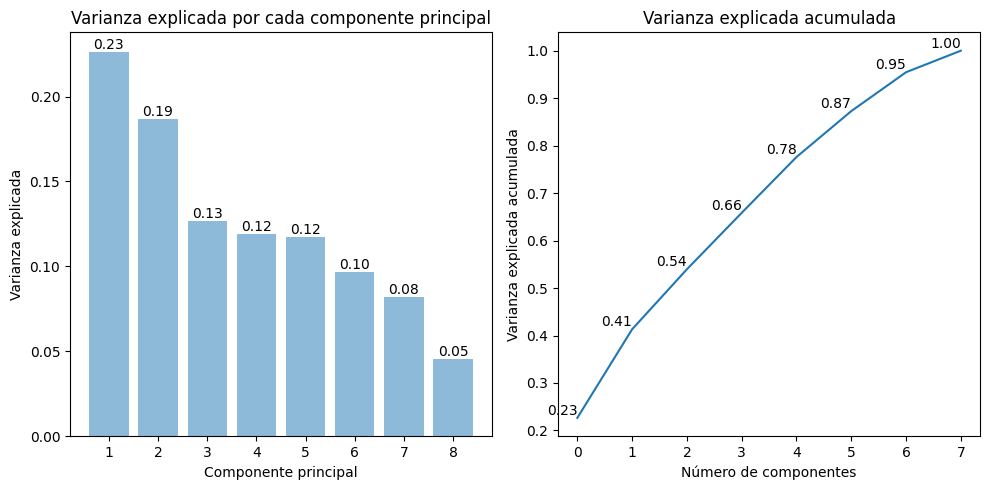

In [6]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# Crear una figura con dos subgráficos en una fila y dos columnas
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Visualizar la varianza explicada por cada componente principal
barras = axs[0].bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
axs[0].set_ylabel('Varianza explicada')
axs[0].set_xlabel('Componente principal')
axs[0].set_title('Varianza explicada por cada componente principal')

# Agregar etiquetas a las barras
for i, barra in enumerate(barras):
    axs[0].text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'{pca.explained_variance_ratio_[i]:.2f}',
             ha='center', va='bottom')

# Visualizar la relación de varianza explicada acumulada
axs[1].plot(np.cumsum(pca.explained_variance_ratio_))
axs[1].set_xlabel('Número de componentes')
axs[1].set_ylabel('Varianza explicada acumulada')
axs[1].set_title('Varianza explicada acumulada')

# Agregar etiquetas de valores en los puntos de la línea
for i, valor in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    axs[1].text(i, valor, f'{valor:.2f}', ha='right', va='bottom')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


#Conclusión PCA
En 7 Componentes logramos obtener explicar el 100% de la variablidad de los datos, para el ejercicio se disminuye en una variable con esta tecnica

#Variables de Mayor Impacto en cada Componente

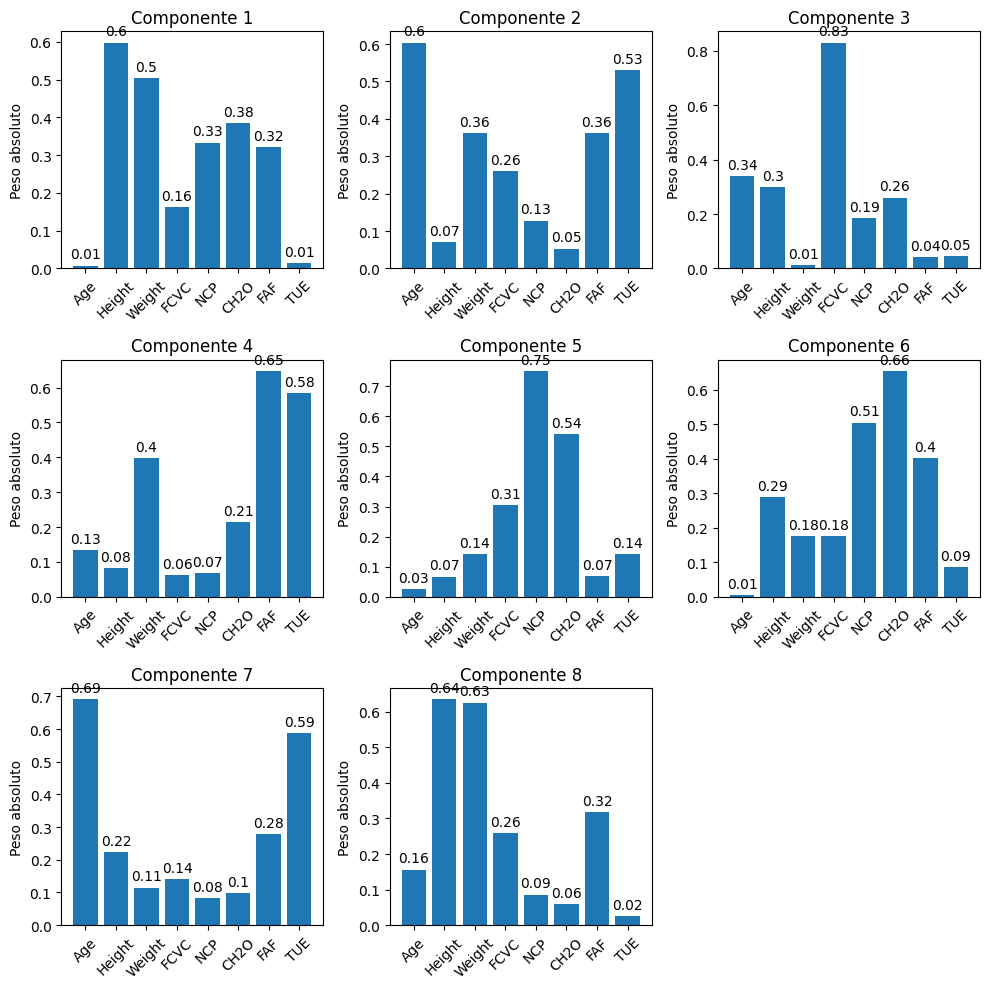

In [7]:
import matplotlib.pyplot as plt
import numpy as np

nombres_variables =X.columns
componentes = pca.components_
# Crear la figura y los ejes
plt.figure(figsize=(10, 10))

# Iterar sobre cada componente y graficar los pesos de las variables
for i, componente in enumerate(componentes):
    plt.subplot(3, 3, i+1)
    bars = plt.bar(np.arange(len(nombres_variables)), np.abs(componente))
    plt.xticks(np.arange(len(nombres_variables)), nombres_variables, rotation=45)
    plt.title("Componente {}".format(i+1))
    plt.ylabel("Peso absoluto")

    # Agregar etiquetas a las barras
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Analisis de Componentes

* Componente 1: Este componente está influenciado principalmente por variables como la altura, el peso, el consumo de agua (CH2O) y la actividad física frecuente (FAF). Parece representar una combinación de características físicas y hábitos de vida saludables.

* Componente 2: Aquí vemos una fuerte influencia de la edad y una influencia moderada de la frecuencia cardíaca al comer (FCVC) y el tiempo de uso de la tecnología (TUE). Este componente podría estar relacionado con las características demográficas y los hábitos relacionados con el tiempo de uso de la tecnología.

* Componente 3: Parece estar influenciado principalmente por el número de comidas principales al día (NCP) y, en menor medida, por el consumo de agua (CH2O). Este componente puede representar hábitos alimenticios y de hidratación.

* Componente 4: Observamos una influencia significativa de la frecuencia cardíaca al comer (FCVC) y una influencia moderada del número de comidas principales al día (NCP) y el tiempo de uso de la tecnología (TUE). Este componente podría estar relacionado con los hábitos de alimentación y el tiempo de uso de la tecnología durante las comidas.

* Componente 5: Aquí vemos una fuerte influencia del consumo de agua (CH2O) y la frecuencia cardíaca al comer (FCVC). Este componente podría estar relacionado con los hábitos de hidratación y alimentación.

* Componente 6: Este componente parece estar influenciado por la actividad física frecuente (FAF) y, en menor medida, por el tiempo de uso de la tecnología (TUE). Puede representar la relación entre la actividad física y el tiempo dedicado a la tecnología.

* Componente 7: Observamos una fuerte influencia del consumo de agua (CH2O) y una influencia moderada del tiempo de uso de la tecnología (TUE). Este componente podría estar relacionado con los hábitos de hidratación y el tiempo dedicado a la tecnología.

* Componente 8: Este componente parece estar influenciado principalmente por la altura, el tiempo de uso de la tecnología (TUE) y, en menor medida, por el peso y la frecuencia cardíaca al comer (FCVC). Podría representar una combinación de características físicas y hábitos de uso de la tecnología.

#Modelo de Regresión logistica en Datos con Reducción PCA

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)


Precisión del modelo: 0.8628841607565012


#Realizamos ajuste del parámetro de regularización 𝐶
Se mejora la presición del Modelo pasando del 0.86 a 0.95

In [9]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar y sus posibles valores
parametros = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Inicializar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(modelo, parametros, cv=5)

# Ejecutar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros encontrados
print("Mejor combinación de hiperparámetros:", grid_search.best_params_)

# Obtener la precisión del modelo con los mejores hiperparámetros
precision = grid_search.best_estimator_.score(X_test, y_test)
print("Precisión del modelo con mejores hiperparámetros:", precision)

Mejor combinación de hiperparámetros: {'C': 100}
Precisión del modelo con mejores hiperparámetros: 0.9550827423167849


In [12]:
from sklearn.metrics import classification_report

# Realizar predicciones en los datos de prueba
y_pred = grid_search.predict(X_test)

# Generar el informe de clasificación
reporte_clasificacion = classification_report(y_test, y_pred)

# Imprimir el informe de clasificación
print(reporte_clasificacion)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.98      0.89      0.93        62
           2       0.97      0.99      0.98        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       0.86      0.89      0.88        56
           6       0.90      0.90      0.90        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.95       423

